In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from numpy.core.fromnumeric import trace
from skimage.io import imread
from skimage.transform import resize
import tensorflow as tf
from tensorflow import keras 
import cv2
from skimage.color import rgb2gray


In [2]:
target=[]
images=[]
flat_data=[]
DATADIR="data/"
CATEGORIES=["0","1"]
for category in CATEGORIES:
    class_num=CATEGORIES.index(category)
    path=os.path.join(DATADIR,category)
    for img in os.listdir(path):
        print("trying",img)
        img=cv2.imread(os.path.join(path,img))
        img = cv2.resize(img, (150, 150))

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        images.append(gray)
        flat_data.append(gray.flatten())
        target.append(class_num)
        print("done")
        
        

target=np.array(target)
images=np.array(images)
flat_data=np.array(flat_data)

trying 0.jpg
done
trying 1.jpg
done
trying 10.jpg
done
trying 100.jpg
done
trying 101.jpg
done
trying 102.jpg
done
trying 103.jpg
done
trying 104.jpg
done
trying 105.jpg
done
trying 106.jpg
done
trying 107.jpg
done
trying 108.jpg
done
trying 109.jpg
done
trying 11.jpg
done
trying 110.jpg
done
trying 111.jpg
done
trying 112.jpg
done
trying 113.jpg
done
trying 114.jpg
done
trying 115.jpg
done
trying 116.jpg
done
trying 117.jpg
done
trying 118.jpg
done
trying 119.jpg
done
trying 12.jpg
done
trying 120.jpg
done
trying 121.jpg
done
trying 122.jpg
done
trying 123.jpg
done
trying 124.jpg
done
trying 125.jpg
done
trying 126.jpg
done
trying 127.jpg
done
trying 128.jpg
done
trying 129.jpg
done
trying 13.jpg
done
trying 14.jpg
done
trying 146.jpg
done
trying 147.jpg
done
trying 148.jpg
done
trying 149.jpg
done
trying 15.jpg
done
trying 150.jpg
done
trying 151.jpg
done
trying 152.jpg
done
trying 153.jpg
done
trying 154.jpg
done
trying 155.jpg
done
trying 156.jpg
done
trying 157.jpg
done
trying 158

(150, 150)

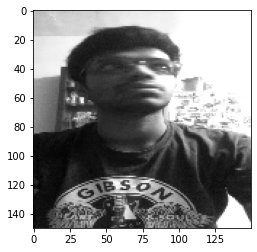

In [3]:
plt.imshow(images[0],cmap='gray')
images[0].shape


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images,target, test_size=0.1, random_state=109)


In [5]:
X_train = X_train.reshape(
    X_train.shape[0], 150, 150, 1)
X_test = X_test.reshape(
    X_test.shape[0], 150, 150, 1)
# images are turing black when normalising
X_train =  np.array(X_train, dtype=np.float32)
X_train /= 255.
X_test = np.array(X_test, dtype=np.float32)
X_test /= 255.
X_test[0].shape


(150, 150, 1)

In [146]:
# one hot encode outputs

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
labels = [str(i) for i in range(2)]



In [6]:
y_train= np.array(y_train)
y_test= np.array(y_test)

In [3]:
# version 1
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32,
                                 (3,3),
                                 input_shape=(150, 150, 1),
                                 activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(16,
                                 (3,3),
                                 activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(16,
                                 (3,3),
                                 activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))                               

model.add(tf.keras.layers.Conv2D(16,
                                 (3,3),
                                 activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'], weighted_metrics=['accuracy'])
model.summary()

model.fit(X_train, y_train, validation_data=(X_test, y_test), shuffle=True,  epochs=50)
model.save("CNNmodelGray")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 16)        0

NameError: name 'X_train' is not defined

In [2]:
from tensorflow.keras.models import load_model


model = load_model('CNNmodelGray')
img = cv2.imread(r'data\1\2-2053.jpg',1)
x = cv2.resize(img, (150, 150))
x= cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
x=x.reshape(1,150,150,1)
print(model.predict(x))



In [6]:
layer_outputs = [layer.output for layer in model.layers[:12]] # Extracts the outputs of the top 12 layers
activation_model =tf.keras.models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [7]:
activations = activation_model.predict(x) # Returns a list of five Numpy arrays: one array per layer activation

In [8]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


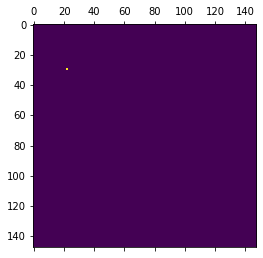

In [9]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')


MemoryError: Unable to allocate 348. GiB for an array with shape (810000, 57600) and data type float64

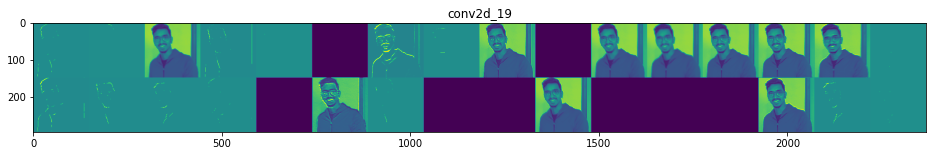

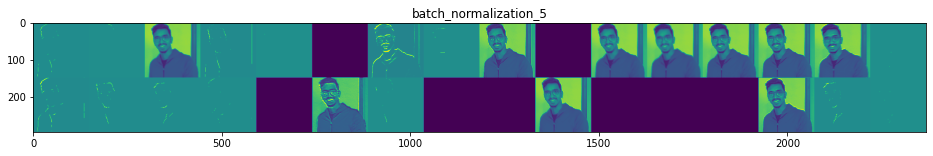

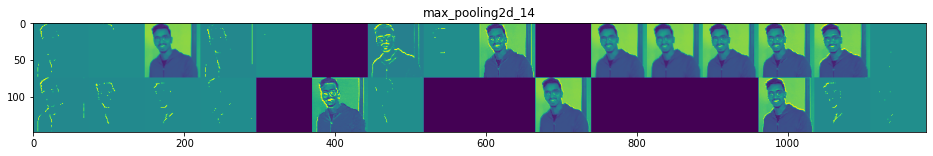

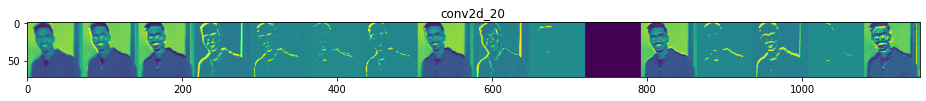

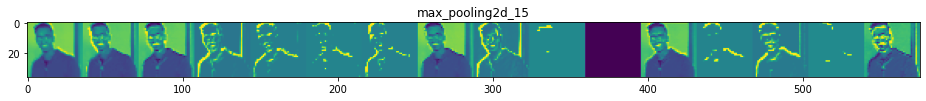

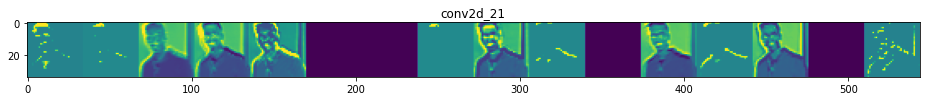

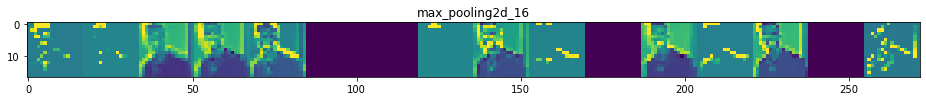

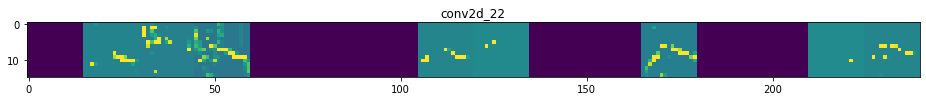

In [14]:
layer_names = []
for layer in model.layers:
    layer_names.append(layer.name)
# layer_names.remove("batch_normalization_4")
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1] 
    n_cols = n_features // images_per_row 
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): 
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, 
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')